In [25]:
using Random
include("src/plotting_utils.jl")
include("src/guillotine_utils.jl")
include("src/guillotine_utils.jl")

coarseness_g (generic function with 1 method)

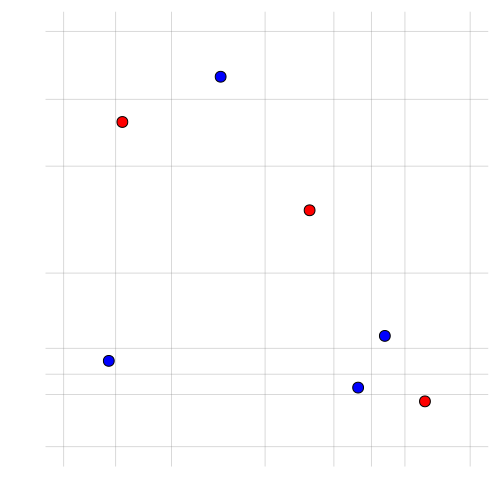

In [22]:
rng = MersenneTwister(1000)
n = 7
S = rand(rng,n,2)
half = n ÷ 2
w = shuffle(rng,[ones(Int,half)...,-ones(Int,n-half)...])

fig = plot_rb_points(S,w)
plot_add_lines!(fig, S)

7×4 Matrix{Any}:
 1  0.61  0.58  'r'
 2  0.92  0.05  'r'
 3  0.36  0.96  'b'
 4  0.81  0.23  'b'
 5  0.06  0.16  'b'
 6  0.74  0.09  'b'
 7  0.1   0.83  'r'


p = 3, q = 2, i = 4, j = 5
--------------------------
                      1  2  3  4  5  6  7  8    midpoint index
sortperm_x          = [5, 7, 3, 1, 6, 4, 2]
sortperm_x[p:p+i-1] = [3, 1, 6, 4]

                      1  2  3  4  5  6  7  8    midpoint index
sortperm_y          = [2, 6, 5, 4, 1, 7, 3]
sortperm_y[q:q+j-1] = [6, 5, 4, 1, 7]

intersection = [1, 6, 4]

     1  2   3   4   5   6  7    point index
w = [1, 1, -1, -1, -1, -1, 1]

Disc_pqij  = abs(sum(w[intersection])) = 1
Count_pqij = length(intersection)      = 3


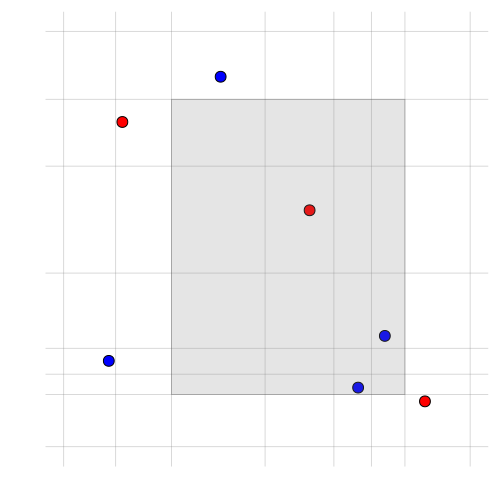

In [23]:
p = 3
q = 2
i = 4
j = 5

fig = print_S_info(S,p,q,i,j)
savefig(fig,"figs/box$p$q$i$j.svg")
fig

C[1,1,n,n]=2


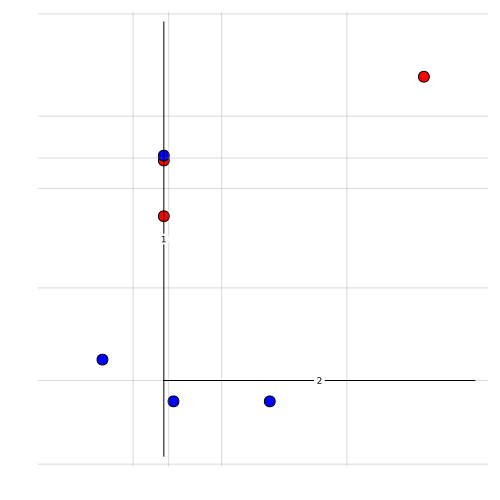

In [415]:
# Ejemplo con lineas perdidas
rng = MersenneTwister()
n = 7
S = rand(rng,n,2)
half = n ÷ 2
w = shuffle(rng,[ones(Int,half)...,-ones(Int,n-half)...])


S[1,1] = S[3,1]
S[2,1] = S[3,1]

S[4,2] = S[5,2]

fig = plot_rb_points(S,w)
plot_add_lines!(fig, S)

C, P, D, midpoints_x, midpoints_y, argcuts, idxcuts = coarseness_g(S,w)

fig = plot_rb_points(S,w)
plot_add_lines!(fig, S)
plot_guillotine_line!(fig,1,1,n,n)
println("C[1,1,n,n]=$(C[1,1,n,n])")
fig

C[1,1,n,n]=5


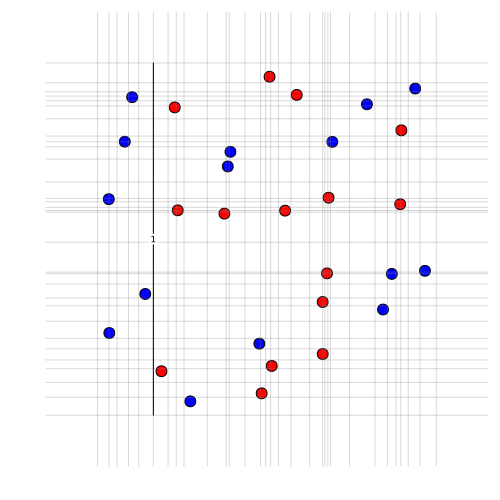

In [383]:
rng = MersenneTwister()
n = 30
S = rand(rng,n,2)
half = n ÷ 2
w = shuffle(rng,[ones(Int,half)...,-ones(Int,n-half)...])



C, P, D, midpoints_x, midpoints_y, argcuts, idxcuts = coarseness_g(S,w)

fig = plot_rb_points(S,w)
plot_add_lines!(fig, S)
plot_guillotine_line!(fig,1,1,n,n)
println("C[1,1,n,n]=$(C[1,1,n,n])")
fig

0